Kuramoto model in complex networks

Number of nodes: 100
Average degree:  9.5
Critical coupling: 0.18597010985976492


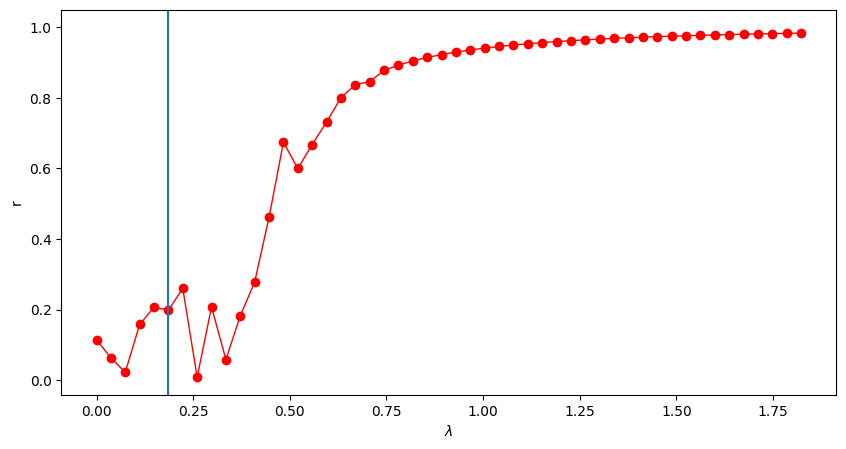

In [2]:
from pylab import *
import numpy as np
from scipy.integrate import *
import matplotlib.pyplot as plt
from scipy.special import zeta
import networkx as nx

# First-order Kuramoto model
def F(Y,t, G, W, lbd):
    #global W, N, lbd, G
    N = len(G.nodes())
    F = zeros((N),float)
    S = zeros((N),float)
    dg = G.degree()
    for i in range(0,N):
        for j in G.neighbors(i):
            S[i] = S[i] + sin(Y[j]-Y[i]) #
    ld = lbd
    F = W + ld*S #traditional Kuramoto
    return F

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Network parameters
N = 100 #number of nodes
av_degree = 10 # average degree
p = float(av_degree)/float(N) #probability of connection in the ER model
m = int(av_degree/2) # number of nodes included at each time step in the BA model
kappa = av_degree # number of neighbors in the WS model

G = nx.barabasi_albert_graph(N,m) # generate a BA network
#G = nx.read_edgelist('nets/celegans.txt')
G = G.to_undirected()
G = nx.convert_node_labels_to_integers(G, first_label=0)

N = len(G) # Number of nodes
vk = dict(G.degree())
vk = list(vk.values())
print("Number of nodes:", N)
print("Average degree: ", mean(vk))
av_k = mean(vk)

from numpy import linalg as LA
A = nx.adjacency_matrix(G)
A = A.todense()
eig, vectors = LA.eig(A)
lambda_max = eig.max()

# Initial phases
w0 = np.pi
y0 = np.random.normal(0, w0, size = N)


# Natural frequencies
W = np.random.uniform(-w0, w0, size = N)
#W = np.random.normal(0, w0, size = N)

# Critical couping %%%%%%%%%%%%%%%%
hist, bin_edges = np.histogram(W, density=True)
g0 = max(hist)
lambda_c = 2/(np.pi*lambda_max*g0)
print('Critical coupling:', lambda_c)

# time of integration
t0 = 0.0  # Start of integration 
h = 0.02 # Step size
Np = 3000 # number of steps
tStop = int(Np*h) # end of integration
t = linspace(t0,tStop,Np)

#forward sync
vlbd = []  # vector that stores the coupling strength
aux = 0
Ns = 1 #Number of simulations
vlbd = np.arange(0, 10*lambda_c, lambda_c/5) #variation of the coupling strength
mvr = np.zeros(shape=shape(vlbd))
for s in arange(0,Ns):
    vr = []  # vector that stores the order parameter
    for lbd in vlbd:
        y = odeint(F, y0, t, (G, W, lbd))
        y = np.array(y)
        y = y[range(len(y)-round(0.9*len(y)),len(y)),:]
        y = y.mean(0)
        psi = mean(y)
        r = abs((1.0/N)*sum(np.exp(1j*y)))
        vr.append(r)
        aux = aux + 1
        #print(aux, ": ", lbd, r)
        y0 = y # adiabatic increase
    mvr = mvr + vr
mvr = mvr/Ns
vlbd = array(vlbd, dtype=float)
# show the results
plt.figure(figsize=(10,5))
plt.plot(vlbd, mvr, '-o', color='red', linewidth=1)
plt.axvline(x =lambda_c)
xlabel(r"$\lambda$")
ylabel("r")
plt.plot(True)    

<Axes: xlabel='Time', ylabel='$\\sin(\\theta)$'>

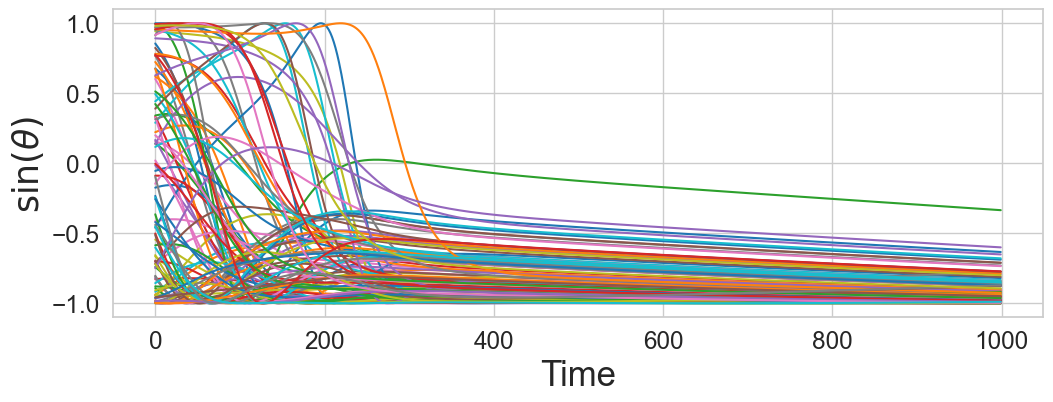

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from kuramoto import Kuramoto, plot_phase_coherence, plot_activity

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.6)

# Instantiate a random graph and transform into an adjacency matrix
graph_nx = nx.erdos_renyi_graph(n=100, p=1) # p=1 -> all-to-all connectivity
graph = nx.to_numpy_array(graph_nx)

# Instantiate model with parameters
model = Kuramoto(coupling=3, dt=0.01, T=10, n_nodes=len(graph))

# Run simulation - output is time series for all nodes (node vs time)
act_mat = model.run(adj_mat=graph)

# Plot all the time series
plot_activity(act_mat)

<Axes: xlabel='Time', ylabel='Order parameter'>

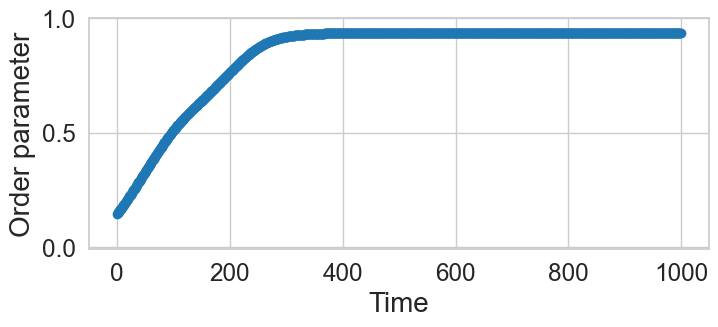

In [4]:
# Plot evolution of global order parameter R_t
plot_phase_coherence(act_mat)

<Axes: xlabel='Time', ylabel='$\\sin(\\theta)$'>

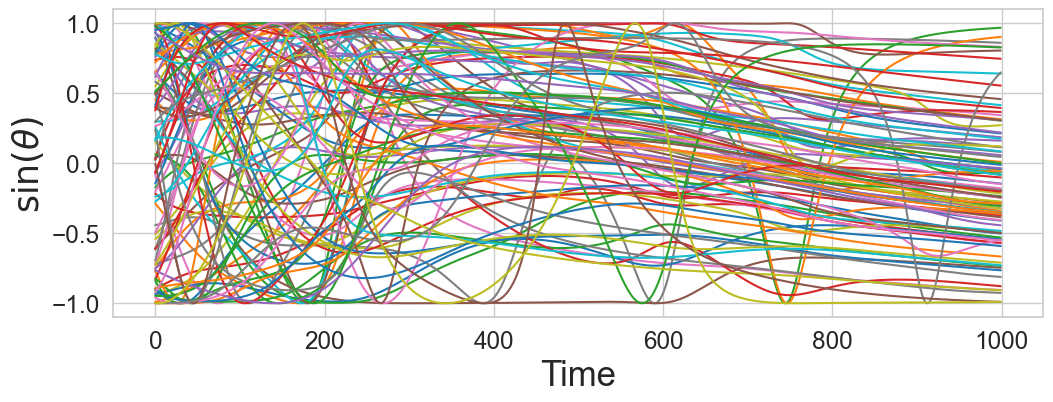

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from kuramoto import Kuramoto, plot_phase_coherence, plot_activity

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.6)

N = 100
av_degree = 8
m = int(av_degree/2)
G = nx.barabasi_albert_graph(N, m)
graph = nx.to_numpy_array(G)

# Instantiate model with parameters
model = Kuramoto(coupling=3, dt=0.01, T=10, n_nodes=len(graph))

# Run simulation - output is time series for all nodes (node vs time)
act_mat = model.run(adj_mat=graph)

# Plot all the time series
plot_activity(act_mat)

<Axes: xlabel='Time', ylabel='Order parameter'>

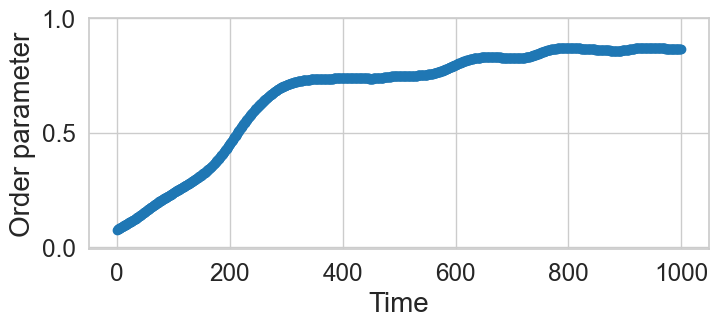

In [6]:
plot_phase_coherence(act_mat)